In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from frank.geometry import SourceGeometry
from frank.io import load_uvtable
from frank.radial_fitters import FrankFitter, FourierBesselFitter

# Upload gridded data

In [3]:
# Data source AS209 1mm visibilities gridded

rad_to_arcsec = 3600 * 180 / np.pi

# Huang 2018 
inc = 34.97
pa = 85.76
dra = 1.9e-3
ddec = -2.5e-3
r_out = 1.9

# Frank Parameters
n_pts = 300
alpha = 1.3
w_smooth = 1e-1

# UVtable used for the simulations on AS209 at 1mm.
dir = "../data/"
data_file = dir +'AS209_continuum_prom_1chan_30s_keepflagsFalse_gridded.txt'

 # load data
u, v, Vis, Weights = np.loadtxt(data_file, unpack = True)

geom = SourceGeometry(inc= inc, PA= pa, dRA= dra, dDec= ddec)

# Test exploring 2D-DFT with Frank

In [4]:
N = 25

In [ ]:
#FF = FrankFitter(1.9, 300, geom, alpha = alpha, weights_smooth = w_smooth)
import time
start_time = time.time()
FF = FourierBesselFitter(r_out, N, geom)
sol_new = FF.fit(u, v, Vis, Weights)
print("--- %s minutes ---" % (time.time()/60 - start_time/60))

In [6]:
len(sol_new.mean)

625

In [7]:
dx = dy =  2*r_out/(N**2*rad_to_arcsec)

In [8]:
I = sol_new.mean.real/(dx*dy)
#I

In [9]:
I_reshape = I.reshape((N,N))

In [10]:
r_out_rad = r_out

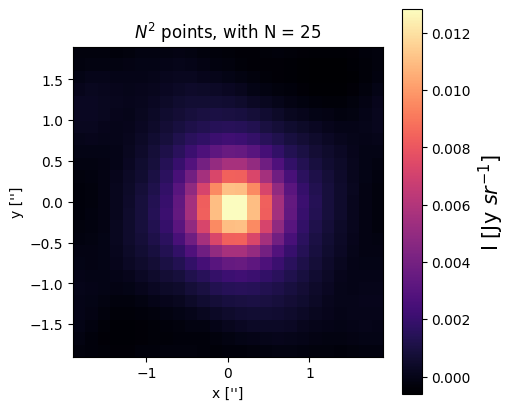

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = ax.imshow(I_reshape, cmap="magma", extent=[-r_out_rad, r_out_rad, -r_out_rad, r_out_rad])
cmap = plt.colorbar(plot)
cmap.set_label(r'I [Jy $sr^{-1}$]', size = 15)
ax.set_title(r'$N^{2}$ points, with N = ' + str(N))
ax.set_xlabel("x ['']")
ax.set_ylabel("y ['']")
plt.show()